In [7]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np

In [8]:
N = 10  # number of pairs
silent = False
np.random.seed(4)
balls = np.array([ [i, np.random.random(), np.random.random()] for i in range(N) ])
holes = np.array([ [N + i, np.random.random(), np.random.random()] for i in range(N) ])
if not silent: 
    print('balls = {}'.format((np.transpose(balls))[:][0]))
    print('        {}'.format([ round(x[1],3) for x in balls ]))
    print('        {}'.format([ round(x[2],3) for x in balls ]))
    print('holes = {}'.format((np.transpose(holes))[:][0]))
    print('      = {}'.format([ round(x[1],3) for x in holes ]))
    print('      = {}'.format([ round(x[2],3) for x in holes ]))

balls = [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
        [0.967, 0.973, 0.698, 0.976, 0.253, 0.779, 0.863, 0.164, 0.009, 0.044]
        [0.547, 0.715, 0.216, 0.006, 0.435, 0.198, 0.983, 0.597, 0.387, 0.957]
holes = [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
      = [0.436, 0.786, 0.173, 0.601, 0.733, 0.528, 0.522, 0.158, 0.524, 0.401]
      = [0.949, 0.866, 0.075, 0.168, 0.408, 0.938, 0.108, 0.545, 0.638, 0.65]


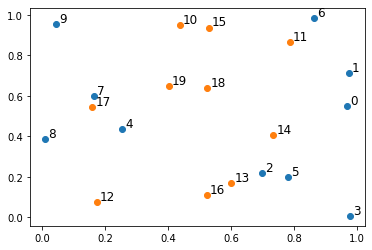

In [9]:
plt.scatter(np.transpose(balls)[:][1], np.transpose(balls)[:][2])
plt.scatter(np.transpose(holes)[:][1], np.transpose(holes)[:][2])
for i in range(N):
    plt.annotate(str(i), (np.transpose(balls)[1][i]+.01, np.transpose(balls)[2][i]+.01), fontsize=12)
    plt.annotate(str(N + i), (np.transpose(holes)[1][i]+.01, np.transpose(holes)[2][i]+.01), fontsize=12)
if not silent: plt.show()
# plt.scatter(np.transpose(balls)[:][1], np.transpose(balls)[:][2])
# plt.scatter(np.transpose(holes)[:][1], np.transpose(holes)[:][2])
# for i in range(N):
#     plt.plot([balls[i][1], holes[i][1]], [balls[i][2], holes[i][2]], c = '#4CAF50')
#     plt.annotate(str(i), (np.transpose(balls)[1][i]+.01, np.transpose(balls)[2][i]+.01), fontsize=12)
#     plt.annotate(str(i), (np.transpose(holes)[1][i]+.01, np.transpose(holes)[2][i]+.01), fontsize=12)
# if not silent: plt.show()

In [10]:
def m_line_by_mass_centers():
    balls_center = [np.mean(np.transpose(balls)[1][:]), np.mean(np.transpose(balls)[2][:])]
    if not silent: print('balls_center = [{:.2f}, {:.2f}]'.format(balls_center[0],  balls_center[1]))
    holes_center = [np.mean(np.transpose(holes)[1][:]), np.mean(np.transpose(holes)[2][:])]
    if not silent: print('holes_center = [{:.2f}, {:.2f}]'.format(holes_center[0],  holes_center[1]))
    # y = m*x + b
    m = (holes_center[1] - balls_center[1]) / (holes_center[0] - balls_center[0])
    b = holes_center[1] - m * holes_center[0] # y - m*x
    if not silent: print('y = {:.2f} * x + {:.2f}'.format(m, b))
    return [m, b]


In [11]:
def uv_coordinates(point, R_abarot):
    return R_abarot.dot(point[1:])

def change_coordinate_system(points):
    [m, b] = m_line_by_mass_centers()
    # New coordinate system
    u = np.array([1, m]) * (m ** 2 + 1) ** (-.5)
    v = np.array([-u[1], u[0]])
    if not silent: print('u = [{:.2f}, {:.2f}]\tv = [{:.2f}, {:.2f}]'.format(u[0], u[1] , v[0], v[1]))
    R = np.array(np.transpose([u, v]))
    if not silent: print('R = \n{}'.format(R))

    # inverse rotation matrix
    R_abarot = np.transpose(R)
    # R_abarot = np.linalg.inv(R)
    if not silent: print('det(R^(-1)) = {}\n'.format(np.linalg.det(R)))

    new_coordinates = np.zeros((N,3))
    for i in range(N):
        uv_point = uv_coordinates(points[i], R_abarot)
        new_coordinates[i] = np.array([points[i][0], uv_point[0], uv_point[1]])
    return new_coordinates

In [13]:
# def count_balls_holes(balls, holes):
# count_balls_holes:
balls_uv = change_coordinate_system(balls)
holes_uv = change_coordinate_system(holes)
if not silent: print('balls_uv = \t\t\t\tholes_uv =')
for i in range(N):
    if not silent: print('{} \t {}'.format(balls_uv[i], holes_uv[i]))
points_all = np.concatenate((balls_uv, holes_uv)) 
points_all_byX = points_all[points_all[:,1].argsort(kind='mergesort')]
points_all_byY = points_all[points_all[:,2].argsort(kind='mergesort')]
if not silent: print('\npoints_all_byX = \t\t\tpoints_all_byY =')
for i in range(2*N):
    if not silent: print('{} \t {}'.format(points_all_byX[i], points_all_byY[i]))

balls_count = np.zeros(2 * N)
holes_count = np.zeros(2 * N)

balls_center = [0.57, 0.50]
holes_center = [0.49, 0.53]
y = -0.35 * x + 0.71
u = [0.94, -0.33]	v = [0.33, 0.94]
R = 
[[ 0.94307086  0.33259188]
 [-0.33259188  0.94307086]]
det(R^(-1)) = 1.0

balls_center = [0.57, 0.50]
holes_center = [0.49, 0.53]
y = -0.35 * x + 0.71
u = [0.94, -0.33]	v = [0.33, 0.94]
R = 
[[ 0.94307086  0.33259188]
 [-0.33259188  0.94307086]]
det(R^(-1)) = 1.0

balls_uv = 				holes_uv =
[0.         0.72997266 0.83770505] 	 [10.          0.09569505  1.04001167]
[1.         0.67956828 0.99762905] 	 [11.          0.45342148  1.07849118]
[2.         0.58613811 0.43584664] 	 [12.          0.13837997  0.12827524]
[3.         0.91862386 0.33057652] 	 [13.          0.51067677  0.35821182]
[4.         0.09397216 0.4941791 ] 	 [14.          0.55578436  0.62910779]
[5.         0.66926487 0.44564746] 	 [15.          0.18602674  1.05977462]
[6.         0.4867927  1.21444106] 	 [16.          0.45601217  0.27554592]
[ 7.         -0.04415357  0.61782083] 	 [17.         -0.03211409  0

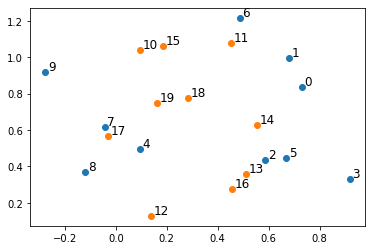

In [14]:
plt.scatter(np.transpose(balls_uv)[:][1], np.transpose(balls_uv)[:][2])
plt.scatter(np.transpose(holes_uv)[:][1], np.transpose(holes_uv)[:][2])
for i in range(N):
    plt.annotate(str(i), (np.transpose(balls_uv)[1][i]+.01, np.transpose(balls_uv)[2][i]+.01), fontsize=12)
    plt.annotate(str(N + i), (np.transpose(holes_uv)[1][i]+.01, np.transpose(holes_uv)[2][i]+.01), fontsize=12)
if not silent: plt.show()

In [22]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return "Point{{{0},{1}}}".format(self.x, self.y)

def onSegment(p, q, r):
    if ((q.x <= max(p.x, r.x)) and (q.x >= min(p.x, r.x)) and 
            (q.y <= max(p.y, r.y)) and (q.y >= min(p.y, r.y))):
        return True
    return False

def orientation(p, q, r):
    # to find the orientation of an ordered triplet (p,q,r)
    # function returns the following values:
    # 0 : Colinear points
    # 1 : Clockwise points
    # 2 : Counterclockwise
      
    # See https://www.geeksforgeeks.org/orientation-3-ordered-points/amp/ 
    # for details of below formula. 
      
    val = (float(q.y - p.y) * (r.x - q.x)) - (float(q.x - p.x) * (r.y - q.y))
    
    if (val > 0):
        # Clockwise orientation
        return 1
    elif (val < 0):
        # Counterclockwise orientation
        return 2
    else:
        # Colinear orientation
        return 0

def doIntersect(p1,q1,p2,q2):
    # Find the 4 orientations required for 
    # the general and special cases
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)
  
    # General case
    if ((o1 != o2) and (o3 != o4)):
        return True
  
    # Special Cases
  
    # p1 , q1 and p2 are colinear and p2 lies on segment p1q1
    if ((o1 == 0) and onSegment(p1, p2, q1)):
        return True
  
    # p1 , q1 and q2 are colinear and q2 lies on segment p1q1
    if ((o2 == 0) and onSegment(p1, q2, q1)):
        return True
  
    # p2 , q2 and p1 are colinear and p1 lies on segment p2q2
    if ((o3 == 0) and onSegment(p2, p1, q2)):
        return True
  
    # p2 , q2 and q1 are colinear and q1 lies on segment p2q2
    if ((o4 == 0) and onSegment(p2, q1, q2)):
        return True
  
    # If none of the cases
    return False

In [28]:
def create_connections(subproblem_balls, subproblem_holes, connections):
    # Subproblem -> a set of points
    # Balls' indexes: 0..N-1
    # Holes' indexes: N..2N-1
    bn = subproblem_balls.shape[0]
    hn = subproblem_holes.shape[0]
    print("CREATING CONNECTIONS")
    print(bn)
    print(hn)

    if bn == 1:
        connections.append([subproblem_balls[0,0], subproblem_holes[0,0]])
    elif bn == 2:
        connections.append(subproblem_balls[0,0], subproblem_holes[0,0])
        connections.append(subproblem_balls[1,0], subproblem_holes[1,0])

        b1 = Point(subproblem_balls[0,1], subproblem_balls[0,2])
        b2 = Point(subproblem_balls[1,1], subproblem_balls[1,2])
        h1 = Point(subproblem_holes[0,1], subproblem_holes[0,2])
        h2 = Point(subproblem_holes[1,1], subproblem_holes[1,2])

        connections.append([b1, h1])
        connections.append([b2, h2])

        print(doIntersect(b1, h1, b2, h2))
    elif bn == 3:
        b1 = Point(subproblem_balls[0,1], subproblem_balls[0,2])
        b2 = Point(subproblem_balls[1,1], subproblem_balls[1,2])
        b3 = Point(subproblem_balls[2,1], subproblem_balls[2,2])

        h1 = Point(subproblem_holes[0,1], subproblem_holes[0,2])
        h2 = Point(subproblem_holes[1,1], subproblem_holes[1,2])
        h3 = Point(subproblem_holes[2,1], subproblem_holes[2,2])

        connections.append([b1, h1])
        connections.append([b2, h2])
        connections.append([b3, h3])

        for con1 in connections:
            for con2 in connections:
                if con1 != con2:
                    print(doIntersect(con1[0], con1[1], con2[0], con2[1]))
    return connections

In [29]:
pivot_index = -1 # After which point there's a division to two subproblems

balls_left_count = 0
holes_left_count = 0
pivot_found = False

for i in range(2 * N):
    if points_all_byY[i,0] >= N:
        holes_left_count = holes_left_count + 1
    else:
        balls_left_count = balls_left_count + 1

    if balls_left_count == holes_left_count:
        print('PIVOT FOUND by y')
        pivot_found = True
        pivot_index = i
        subproblem_left = points_all_byY[0:i+1,:]
        subproblem_right = points_all_byY[i:,:]

        subproblem_left_holes = subproblem_left[subproblem_left[:,0] >= N]
        subproblem_left_balls = subproblem_left[subproblem_left[:,0] < N]
        print(subproblem_left_balls)
        print(subproblem_left_holes)
        connections = []
        connections = create_connections(subproblem_left_balls, subproblem_left_holes, connections)

        for con in connections:
            print(con[0], con[1])

        print(connections)
        break


PIVOT FOUND by y
[[ 3.          0.91862386  0.33057652]
 [ 8.         -0.12009594  0.36755281]
 [ 2.          0.58613811  0.43584664]]
[[12.          0.13837997  0.12827524]
 [16.          0.45601217  0.27554592]
 [13.          0.51067677  0.35821182]]
CREATING CONNECTIONS
3
3
False
False
False
False
False
False
Point{0.9186238561560836,0.33057652371196833} Point{0.13837997165631732,0.12827524056312453}
Point{-0.12009594093402101,0.3675528145548661} Point{0.45601217009326844,0.2755459181361893}
Point{0.5861381112325409,0.4358466442853727} Point{0.5106767705648084,0.35821181973379307}
[[<__main__.Point object at 0x7f533368e190>, <__main__.Point object at 0x7f533368eee0>], [<__main__.Point object at 0x7f533368e2e0>, <__main__.Point object at 0x7f533368e640>], [<__main__.Point object at 0x7f533368e340>, <__main__.Point object at 0x7f533368ec40>]]


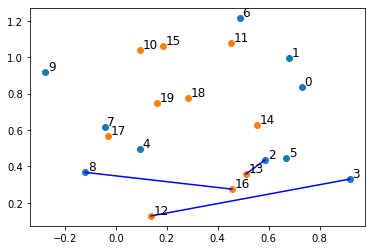

In [27]:
plt.scatter(np.transpose(balls_uv)[:][1], np.transpose(balls_uv)[:][2])
plt.scatter(np.transpose(holes_uv)[:][1], np.transpose(holes_uv)[:][2])
for i in range(N):
    plt.annotate(str(i), (np.transpose(balls_uv)[1][i]+.01, np.transpose(balls_uv)[2][i]+.01), fontsize=12)
    plt.annotate(str(N + i), (np.transpose(holes_uv)[1][i]+.01, np.transpose(holes_uv)[2][i]+.01), fontsize=12)
# if not silent: plt.show()

for conn in connections:
    plt.plot([conn[0].x, conn[1].x], [conn[0].y, conn[1].y], 'b')

if not silent: plt.show()